In [1]:
import json
from PIL import Image, ImageDraw, ImageFont
from matplotlib import pyplot as plt


def get_font_size(text, font_path, desired_width):
    min_size, max_size = 7, 40  # reasonable range for fontsize
    while max_size - min_size > 1:
        font_size = (min_size + max_size) // 2
        font = ImageFont.truetype(font_path, font_size)
        if font.getsize(text)[0] > desired_width:
            max_size = font_size
        else:
            min_size = font_size
    return ImageFont.truetype(font_path, min_size)

with open("data/subset_epita.json", 'r') as file:
    exports = json.load(file)

datas = []


for i in range(len(exports)):
    if exports[i]['document_type_id'] == 8:
        datas.append(exports[i])
        

width, height = 210 *5, 297*5

In [2]:
####
# put the following code in an other cell to not reload full dataset each time
####
# path of .ttf
font_path = "AbhayaLibre-Regular.ttf"
def display_image():
    # create a new image with white background
    blank_image = Image.new('RGB', (width, height), 'white')
    # get a drawing context
    d = ImageDraw.Draw(blank_image)
    for line in page_0:
        if line['line']['confidence'] > 50:
            for word in line['line']['words']:
                (x, y, w, h) = (word['left']*width, word['top']*height, word['width']*width, word['height']*height)
                text = word["text"]
                d.text((x, y), text, font=get_font_size(text, font_path, w), fill=(0, 0, 0))
    # can locally save the page with following line:
    #blank_image.save("output_image.png")
    plt.figure(figsize=(40,20))
    plt.imshow(blank_image)

In [3]:
def abs(a, b):
    r = a - b
    if r < 0:
        return -r
    return r

def regrouper_mots_par_hauteur(doc, tolerance):
    mots_regroupes = []
    
    keys = list(doc.keys())
    keys.pop()
    keys.pop()
    for key in keys:
        page = {}
        lines = doc[key]
        for line in lines:
            for w in line['line']['words']:
                hauteur = w['top']
                found = False
                for h in page:
                    if abs(h, hauteur) <= tolerance:
                        found = True
                        page[h].append(w['text'])
                        break
                if found == True:
                    continue
                if hauteur not in page:
                    page[hauteur] = []
                page[hauteur].append(w['text'])
        mots_regroupes.append(page)
    return mots_regroupes

tolerance = 0.02
docs = []

for doc in datas:
    resultat = regrouper_mots_par_hauteur(doc, tolerance)
    docs.append(resultat)

docs

[[{0.0021962400060147047: ['From',
    'BIOGROUP-LCD',
    'mer.',
    '25',
    'sept.',
    '2019',
    '08:59:25',
    'CEST',
    'Page',
    '1',
    'of',
    '2'],
   0.03754391893744469: ['LABORATOIRE', 'DE', 'BIOLOGIE', 'MEDICALE'],
   0.06099117919802666: ['ORDENER',
    'Agrément',
    '93-197,',
    'Bio',
    'Lam',
    'LCD',
    'SELAS',
    'RCS',
    '414 230 060'],
   0.08199631422758102: [':',
    ':',
    '81,',
    'rue',
    'Ordener',
    '-',
    '75018',
    'PARIS'],
   0.10746031999588013: ['Tél.',
    ':',
    '01 46 06 42 57',
    'Fax',
    ':',
    '01 46 06 99 77',
    'Mail:',
    'labo.ordener@biogroup-icd.fr'],
   0.13622358441352844: ['Laboratoire',
    'ouvert',
    'du',
    'LUNDI',
    'au',
    'VENDREDI',
    'de',
    '7h00',
    'à',
    '19h00',
    'et',
    'le',
    'SAMEDI',
    'de',
    '7h30',
    'à',
    '12h30'],
   0.1649669110774994: ['DR',
    'M.',
    'NGUYEN',
    'DR',
    'M.',
    'MIHOUBI',
    'BIOLOGISTE',
    'MEDICAL'

# Extraire les noms de laboratoire des documents

On va récupérer la ligne avant et après le mot **labo** ou **cabinet**.

In [4]:
def extract_lab(doc):
    words_page0 = list(doc[0].values())
    i = 0
    while i < len(words_page0) :
        found = False
        for word in words_page0[i]:
            if 'labo' in word.lower() or 'cabinet' in word.lower():
                found = True
                break
        if found == True:
            if i != 0:
                print(words_page0[i-1])
            print(words_page0[i])
            if i < len(words_page0) - 1:
                print(words_page0[i+1], '\n')
            i+=2
            break
        else:
            i+=1
        found = False

for doc in docs :
    extract_lab(doc)
    print('\n')

['From', 'BIOGROUP-LCD', 'mer.', '25', 'sept.', '2019', '08:59:25', 'CEST', 'Page', '1', 'of', '2']
['LABORATOIRE', 'DE', 'BIOLOGIE', 'MEDICALE']
['ORDENER', 'Agrément', '93-197,', 'Bio', 'Lam', 'LCD', 'SELAS', 'RCS', '414 230 060'] 



['PARTIE', 'DESTINEE', 'AU', 'LABORATO', 'GREE', 'demande']
['Bon', 'de', 'eurofins', 'de', 'trisomie', '21', 'fotale'] 



['LABORATOIRE', 'DE', 'BIOLOGIE', 'MEDICALE']
['LA', 'FOURCHE', 'Agrément', '93-197,', 'Bio', 'Lam', 'LCD', 'SELAS', 'RCS', '414 230 060'] 



['LE', 'LABO', 'LE', 'LABO', 'PARC', 'MONCEAU']
['LABORATOIRE', 'DE', 'BIOLOGIE', 'MEDICALE', '20', 'rue', 'Alfred', 'De', 'Vigny'] 



['9', 'rue', 'de', 'la', 'Faïencerie', '77130', 'MONTEREAU', 'Tél.', '01.64.32.18.61', 'Fax', '01.64.32.60.38']
['AU', 'LABORATOIRE']
['Mme', 'Schneider', 'Stéphanie', '56,', 'chemin', 'Virginie', 'Pasquier'] 



['455', 'LABORATOIRE', 'DE', 'BIOLOGIE', 'MÉDICALE', 'DROUOT']
['21,', 'rue', 'Drouot', '75009', 'PARIS', '(33)', '01', '45', '23', '10', '45', 'Fa

On récupère tous les noms des laboratoires pour faire une liste et un dictionnaire où on va récupérer l'index des documents pour les stocker avec le laboratoire.

In [29]:
list_labs = ['ordener', 'la fourche', 'drouot', 'alesia', 'denis zago romeo', 'bpo-bioepine', 'probio', 'lbm', 'republique', 'turbigo', 'saint laurent', 'magi', 'bio-sites', 'le marcel', 'guevalt', 'biomag', 'rnrlyses', 'bioardaisne', 'saint jacques', 'gobelins', 'mesanalyses', 'belleville', 'eylau', 'laborizon', 'flandres', 'bio-clinic', 'eurofins', 'charonne', 'tolbiac', 'saint germain', 'marx dormoy', 'gerard noet']
number_docs_per_labs = {'autre' : []}

# Count number of docs for each labs
for i in range(len(docs)) :
    found = False
    for page in docs[i]:
        for words in page.values():
            for lab in list_labs :
                if lab in ' '.join(w.lower() for w in words):
                    found = True
                    if lab not in number_docs_per_labs.keys():
                        number_docs_per_labs[lab] = [i]
                    else :
                        number_docs_per_labs[lab].append(i)
                    break
            if found == True:
                break
        if found == True:
            break
        
    if found == False:
        number_docs_per_labs['autre'].append(i)
            
number_docs_per_labs

{'autre': [3, 14, 47, 57],
 'ordener': [0, 15, 56],
 'eurofins': [1, 11, 27, 51, 62],
 'la fourche': [2],
 'lbm': [4, 10, 20, 23, 25, 26, 35, 40, 42, 50, 52, 60, 61, 68],
 'drouot': [5],
 'alesia': [6],
 'denis zago romeo': [7],
 'bpo-bioepine': [8, 31, 34],
 'probio': [9],
 'republique': [12, 16, 17, 19, 41, 46, 55],
 'turbigo': [13, 63],
 'saint laurent': [18],
 'magi': [21],
 'bio-sites': [22, 66],
 'le marcel': [24],
 'guevalt': [28, 45],
 'biomag': [29],
 'rnrlyses': [30],
 'bioardaisne': [32],
 'saint jacques': [33],
 'gobelins': [36],
 'mesanalyses': [37, 48, 59],
 'belleville': [38],
 'eylau': [39, 53],
 'laborizon': [43],
 'flandres': [44],
 'bio-clinic': [49],
 'charonne': [54],
 'tolbiac': [58],
 'saint germain': [64],
 'marx dormoy': [65],
 'gerard noet': [67, 69]}

On les range dans l'ordre décroissant du nombre de documents.

In [30]:
dict(sorted(number_docs_per_labs.items(), key=lambda item: len(item[1]), reverse=True))

{'lbm': [4, 10, 20, 23, 25, 26, 35, 40, 42, 50, 52, 60, 61, 68],
 'republique': [12, 16, 17, 19, 41, 46, 55],
 'eurofins': [1, 11, 27, 51, 62],
 'autre': [3, 14, 47, 57],
 'ordener': [0, 15, 56],
 'bpo-bioepine': [8, 31, 34],
 'mesanalyses': [37, 48, 59],
 'turbigo': [13, 63],
 'bio-sites': [22, 66],
 'guevalt': [28, 45],
 'eylau': [39, 53],
 'gerard noet': [67, 69],
 'la fourche': [2],
 'drouot': [5],
 'alesia': [6],
 'denis zago romeo': [7],
 'probio': [9],
 'saint laurent': [18],
 'magi': [21],
 'le marcel': [24],
 'biomag': [29],
 'rnrlyses': [30],
 'bioardaisne': [32],
 'saint jacques': [33],
 'gobelins': [36],
 'belleville': [38],
 'laborizon': [43],
 'flandres': [44],
 'bio-clinic': [49],
 'charonne': [54],
 'tolbiac': [58],
 'saint germain': [64],
 'marx dormoy': [65]}

Puis on vérifie le format des documents par rapport au laboratoire.

# LBM

<ipython-input-1-c270257b4ad5>:11: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.
  if font.getsize(text)[0] > desired_width:


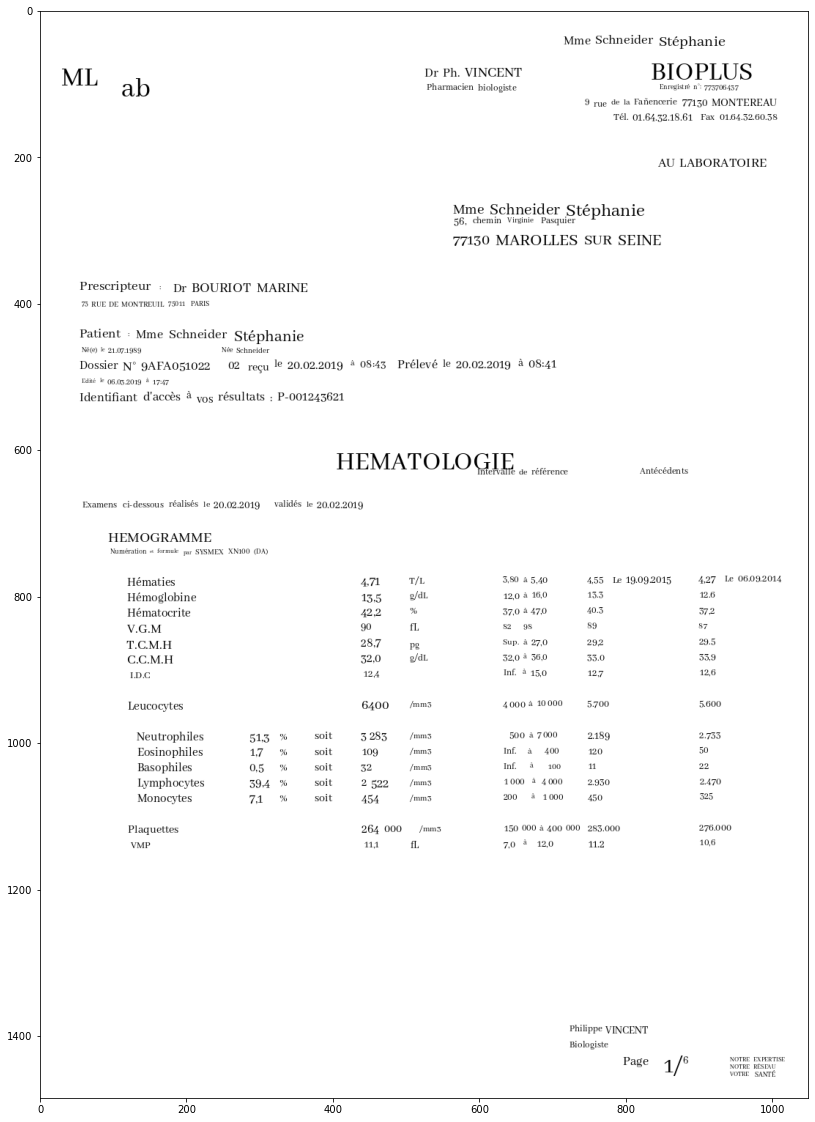

In [31]:
page_0 = datas[4]['3']
display_image()

<ipython-input-1-c270257b4ad5>:11: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.
  if font.getsize(text)[0] > desired_width:


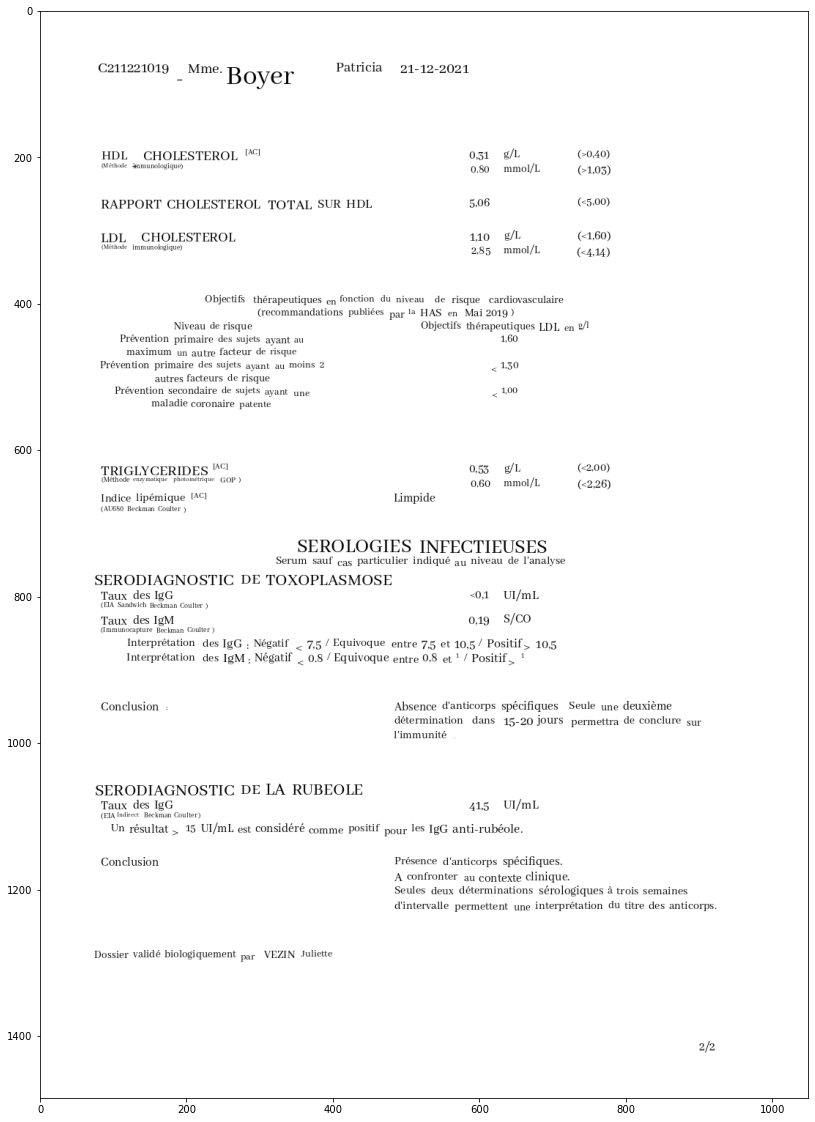

In [32]:
page_0 = datas[10]['1']
display_image()

<ipython-input-1-c270257b4ad5>:11: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.
  if font.getsize(text)[0] > desired_width:


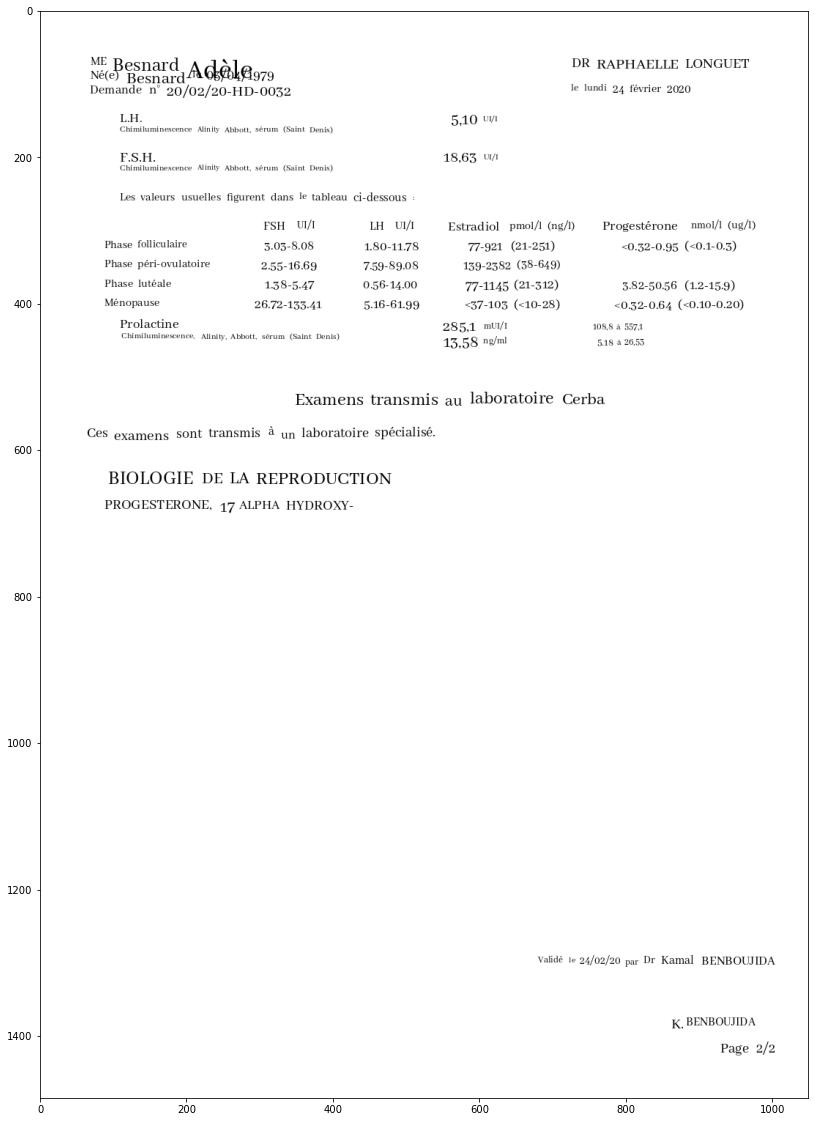

In [33]:
page_0 = datas[40]['1']
display_image()

On remarque dans ce document que les unités font partie du nom des colonnes. Dans ce cas, notre algorithme ne va détecter les unités et donc ne pas reconnaitre les marqueurs.

# Republique

<ipython-input-1-c270257b4ad5>:11: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.
  if font.getsize(text)[0] > desired_width:


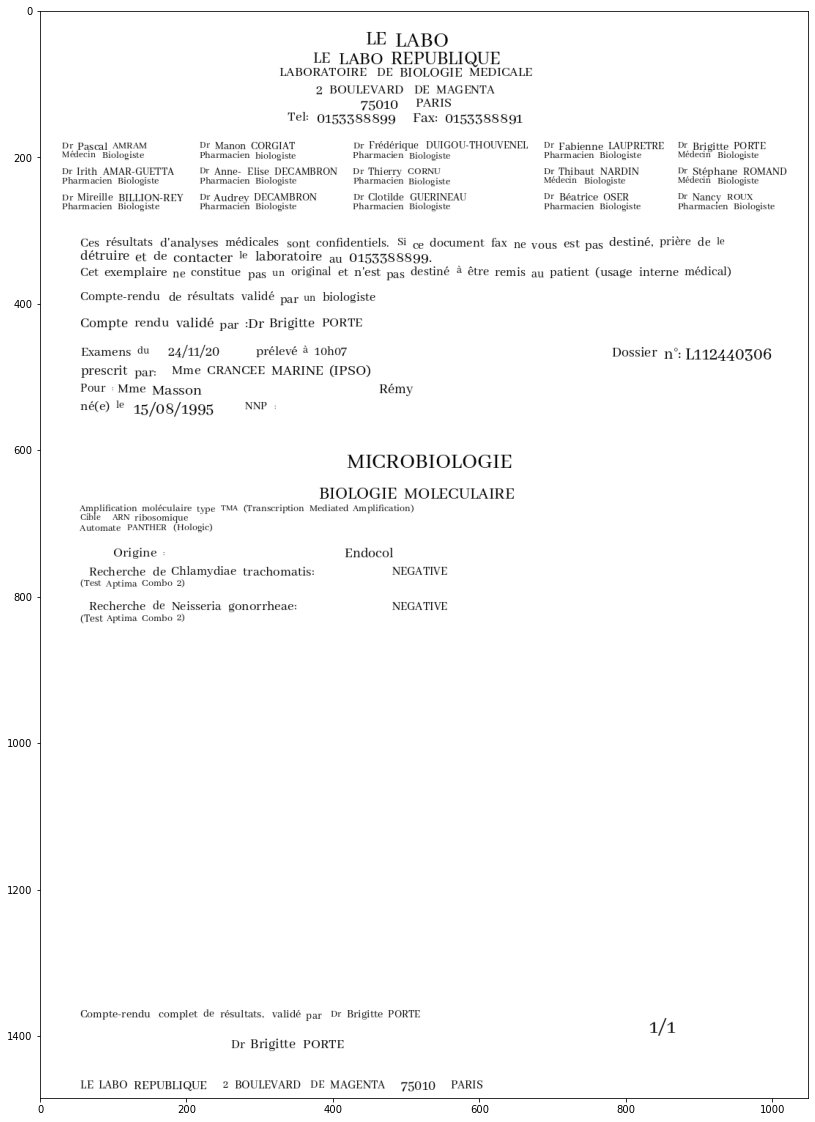

In [34]:
page_0 = datas[12]['0']
display_image()

<ipython-input-1-c270257b4ad5>:11: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.
  if font.getsize(text)[0] > desired_width:


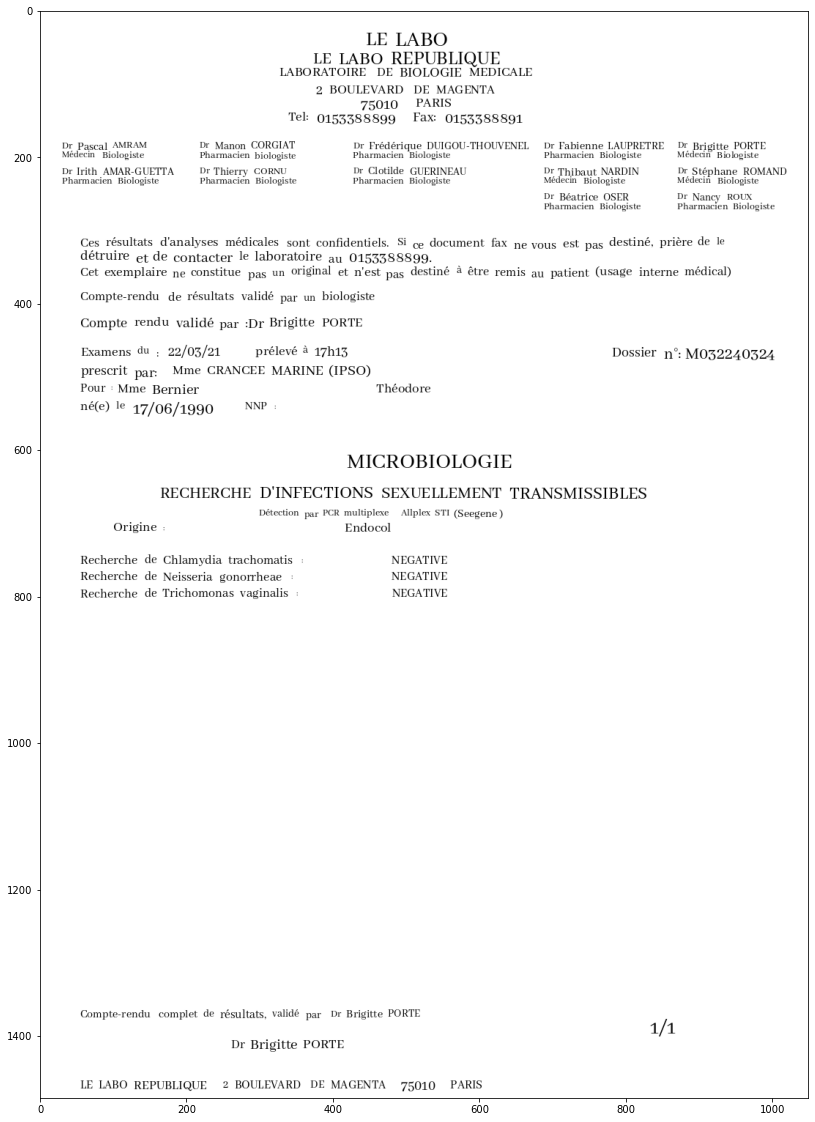

In [35]:
page_0 = datas[16]['0']
display_image()

<ipython-input-1-c270257b4ad5>:11: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.
  if font.getsize(text)[0] > desired_width:


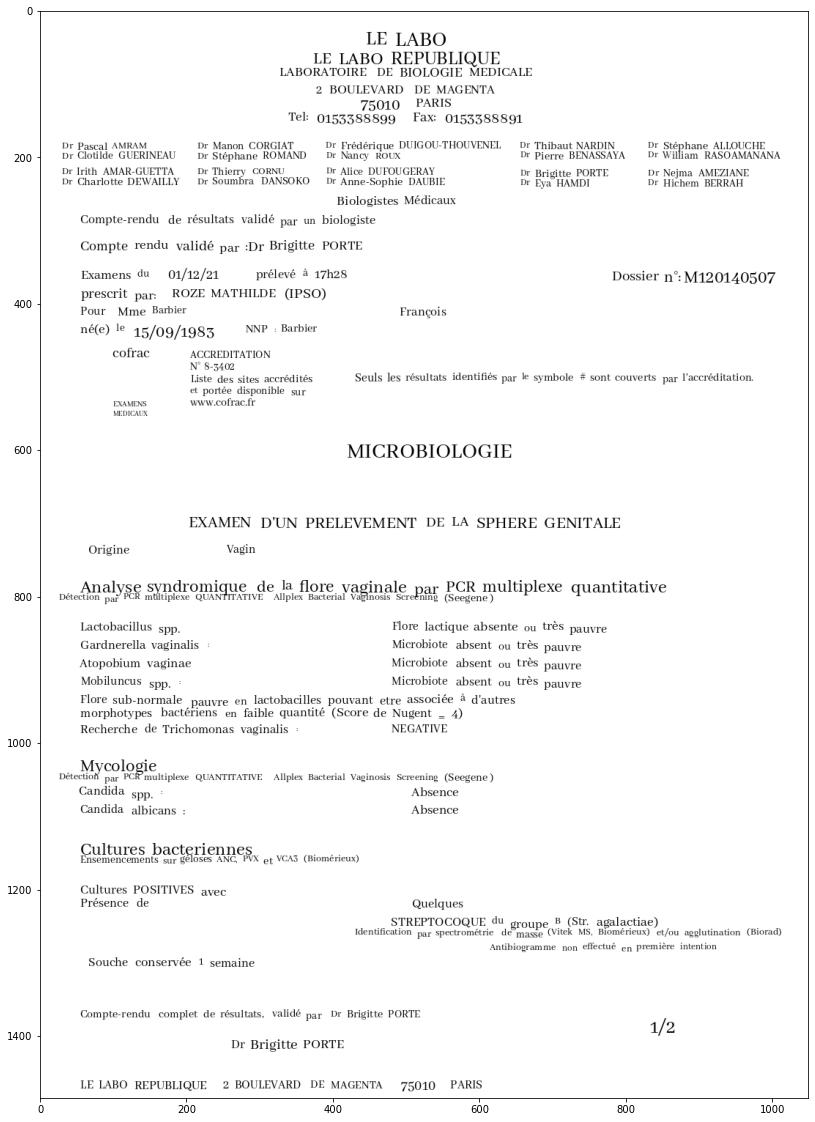

In [36]:
page_0 = datas[41]['0']
display_image()

<ipython-input-1-c270257b4ad5>:11: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.
  if font.getsize(text)[0] > desired_width:


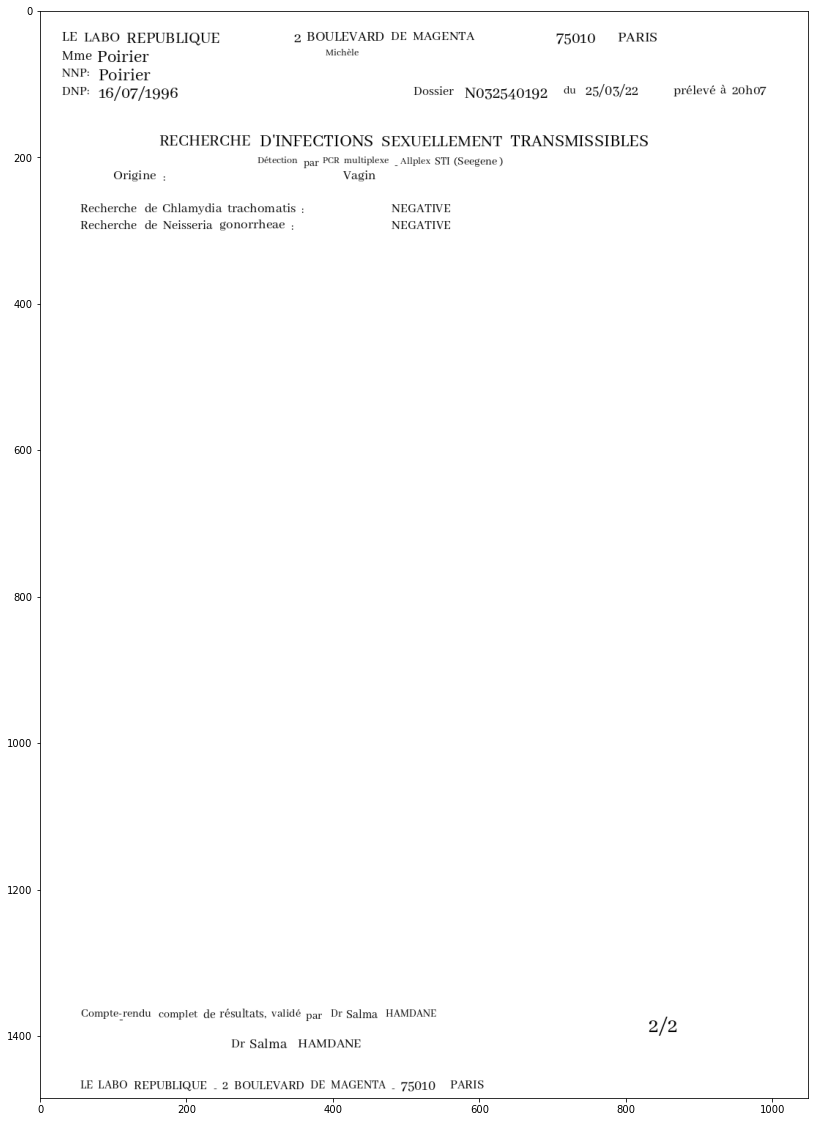

In [37]:
page_0 = datas[55]['1']
display_image()

<ipython-input-1-c270257b4ad5>:11: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.
  if font.getsize(text)[0] > desired_width:


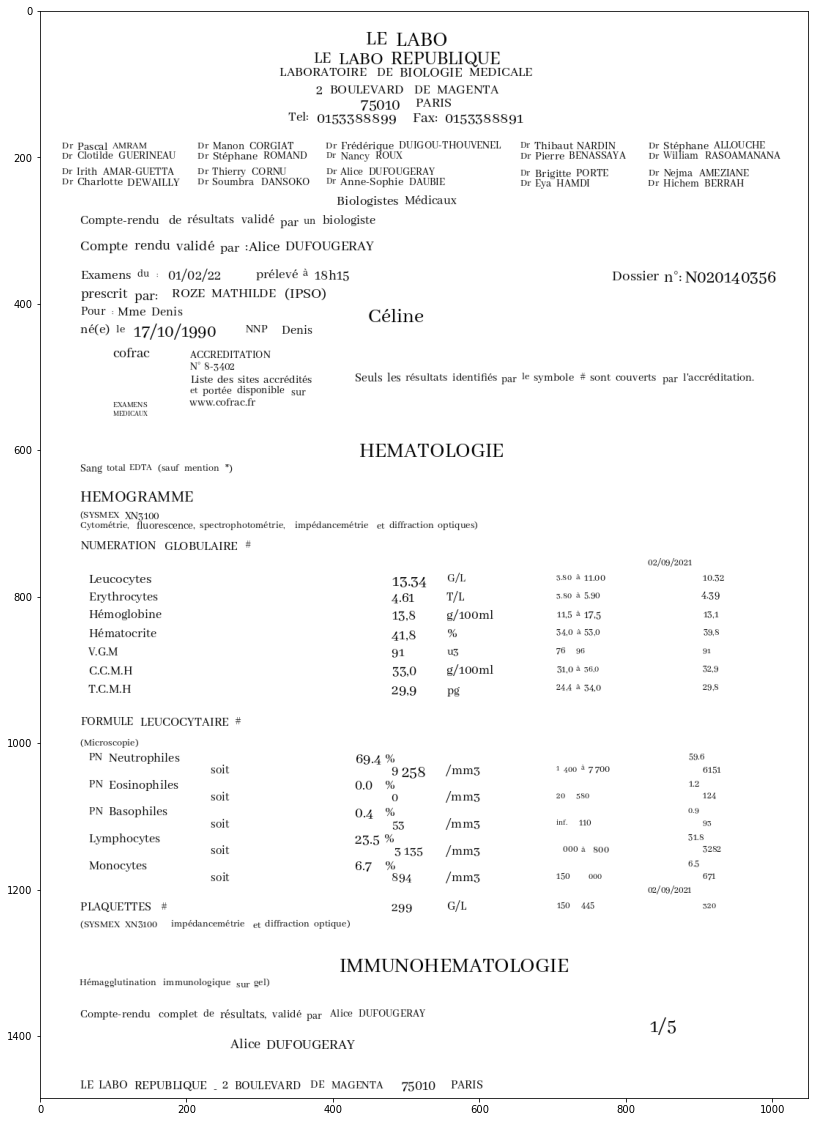

In [38]:
page_0 = datas[19]['0']
display_image()

<ipython-input-1-c270257b4ad5>:11: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.
  if font.getsize(text)[0] > desired_width:


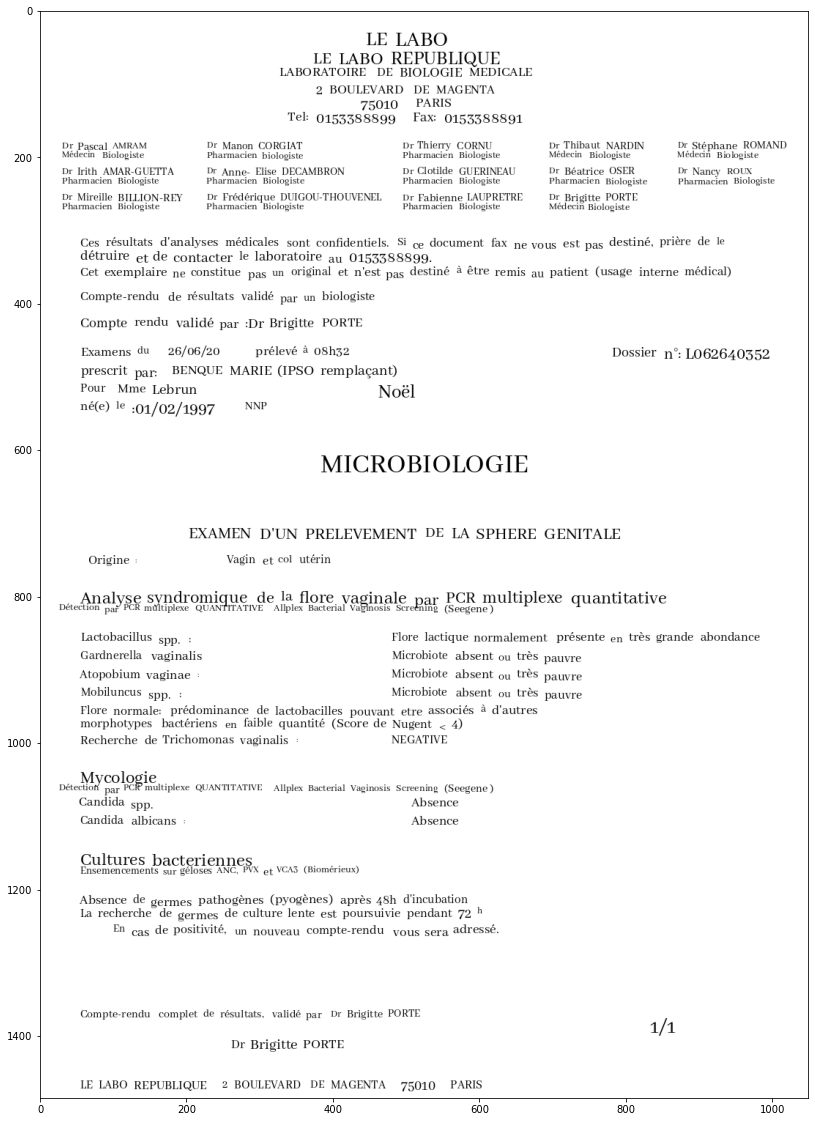

In [39]:
page_0 = datas[17]['0']
display_image()